In [55]:
#pip3 install cfgrib
#pip install eccodes-python
#!pip3 install cfgrib
#!pip3 install eccodes-python
#!pip3 install xarray
#!pip3 install matplotlib
#!pip3 install pandas
#!pip3 install eccodes 
import xarray as xrs
import pandas as pd
import matplotlib.pyplot as plt
import cfgrib

ds = xrs.open_dataset("g20152019/adaptor.mars.external-1710758296.2794812-27871-5-2b8c5e1d-d76b-4f5b-afc6-be3d070806b6.grib", engine='cfgrib')
print(ds)

<xarray.Dataset> Size: 831kB
Dimensions:    (time: 92, latitude: 23, longitude: 14)
Coordinates:
  * time       (time) datetime64[ns] 736B 2019-06-01T12:00:00 ... 2019-08-31T...
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Data variables:
    fbupinx    (time, latitude, longitude) float32 118kB ...
    drtcode    (time, latitude, longitude) float32 118kB ...
    dufmcode   (time, latitude, longitude) float32 118kB ...
    ffmcode    (time, latitude, longitude) float32 118kB ...
    fdsrte     (time, latitude, longitude) float32 118kB ...
    fwinx      (time, latitude, longitude) float32 118kB ...
    infsinx    (time, latitude, longitude) float32 118kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0


In [56]:
import math
def DistanceTwoPoints(lat1, lon1, lat2, lon2):
    R = 6371e3  # Radius of the Earth in meters
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c  # Distance in meters

def count_decimal_places(number):
    str_num = str(number)
    if '.' in str_num:
        return len(str_num) - str_num.index('.') - 1
    else:
        return 0

def find_nearest(lat, lon, latitudes, longitudes):
    min_distance = None
    nearest_point = None

    for lat2, lon2 in zip(latitudes, longitudes):
        distance = DistanceTwoPoints(lat, lon, lat2, lon2)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            nearest_point = (lat2, lon2)

    return min_distance, nearest_point

In [57]:
print("Coordinates:", ds.coords)
print("Variables:", ds.data_vars)

Coordinates: Coordinates:
  * time       (time) datetime64[ns] 736B 2019-06-01T12:00:00 ... 2019-08-31T...
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Variables: Data variables:
    fbupinx   (time, latitude, longitude) float32 118kB ...
    drtcode   (time, latitude, longitude) float32 118kB ...
    dufmcode  (time, latitude, longitude) float32 118kB ...
    ffmcode   (time, latitude, longitude) float32 118kB ...
    fdsrte    (time, latitude, longitude) float32 118kB ...
    fwinx     (time, latitude, longitude) float32 118kB ...
    infsinx   (time, latitude, longitude) float32 118kB ...


In [39]:
fwinx = ds['fwinx']
lat = ds['latitude']
lon = ds['longitude']
tm = ds['time']

print(lat[1].coords['latitude'].values)
print(len(lat))
print(len(lon))
#print(lon)

41.95
23
14


In [40]:
print(len(ds['fwinx'].values))
print(len(ds['fwinx'][0].values))

122
23


In [59]:
# Select the 'fwinx' data variable at the desired time
fwinx_at_time = ds['fwinx'].sel(time='2019-06-20T12:00:00')

print(fwinx_at_time)

# Get the 'latitude' coordinate
latitudes = fwinx_at_time.latitude
longitudes = fwinx_at_time.longitude

# Print the latitudes
print(latitudes.values)
print(len(latitudes.values))
print(longitudes.values)
print(len(longitudes.values))

novas_lat = []
novas_lon = []
for lat in range(len(latitudes)):
    for lon in range(len(longitudes)):
        #novas_lat.append(latitudes[lat])
        novas_lat.append(latitudes[lat].values)
        novas_lon.append(longitudes[lon].values)
        #novas_lon.append(longitudes[lon])

print(len(novas_lat))
print(len(novas_lon))

#,

LATITUDE_SING = 40.0299179999034
LONGITUDE_SING = -7.77199699984656
min_distance, nearest_point = find_nearest(LATITUDE_SING, LONGITUDE_SING, novas_lat, novas_lon)
print(min_distance, nearest_point)

<xarray.DataArray 'fwinx' (latitude: 23, longitude: 14)> Size: 1kB
[322 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 8B 2019-06-20T12:00:00
    surface    float64 8B ...
  * latitude   (latitude) float64 184B 42.2 41.95 41.7 41.45 ... 37.2 36.95 36.7
  * longitude  (longitude) float64 112B 350.2 350.4 350.7 ... 352.9 353.2 353.4
Attributes: (12/28)
    GRIB_paramId:                             260540
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      322
    GRIB_typeOfLevel:                         surface
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    ...                                       ...
    GRIB_name:                                Forest fire weather index
    GRIB_shortName:                           fwinx
    GRIB_units:                               Numeric
    long_name:                                Forest fire weather index
    uni

In [60]:
print(novas_lat)
print(novas_lon)
# Convert longitude from [0, 360] to [-180, 180]
novas_lon = [(lon-360 if lon>180 else lon) for lon in novas_lon]

[array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(42.2), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.95), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.7), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.45), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(41.2), array(40.95), array(40.95), array(40.95), array(40.95), array

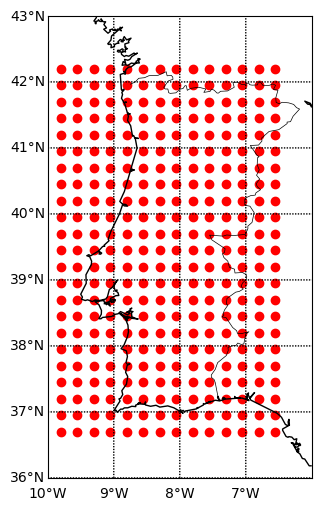

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10,6))

# Create a Basemap instance for Portugal and expanded north
m = Basemap(llcrnrlon=-10, llcrnrlat=36, urcrnrlon=-6, urcrnrlat=43, resolution='i')

# Draw coastlines, countries, and meridians/parallels
m.drawcoastlines()
m.drawcountries()
m.drawmeridians(np.arange(-10, -6, 1), labels=[1,0,0,1])
m.drawparallels(np.arange(36, 51, 1), labels=[1,0,0,1])  # Adjusted to match new map extent

# Convert latitudes and longitudes to map projection coordinates
x, y = m(novas_lon, novas_lat)

# Plot the data
m.scatter(x, y, marker='o', color='red')

plt.savefig('stations.png', dpi=300)
# Show the plot
plt.show()

In [47]:
latitude_data_array, longitude_data_array = nearest_point
print("Latitude:", latitude_data_array, "Longitude:", longitude_data_array)

#latitude = latitude_data_array.values.item()
#longitude = longitude_data_array.values.item()

#print("Latitude:", latitude)
#print("Longitude:", longitude)

Latitude: 40.2 Longitude: 352.7


In [59]:
DAY = 20
HOUR = 12

fwinx_value = ds['fwinx'].sel(time=f'2022-06-{DAY}T{HOUR}:00:00', latitude=latitude, longitude=longitude)
drtcode_value = ds['drtcode'].sel(time=f'2022-06-{DAY}T{HOUR}:00:00', latitude=latitude, longitude=longitude)
dufmcode_value = ds['dufmcode'].sel(time=f'2022-06-{DAY}T{HOUR}:00:00', latitude=latitude, longitude=longitude)
ffmcode_value = ds['ffmcode'].sel(time=f'2022-06-{DAY}T{HOUR}:00:00', latitude=latitude, longitude=longitude)


#drtcode    (time, latitude, longitude) float32 79kB ... -> Drought Code: DC 
#    dufmcode   (time, latitude, longitude) float32 79kB ... -> Duff Moisture Code Code
#    ffmcode    (time, latitude, longitude) float32 79kB ... -> Fine Fuel Moisture Code

print(fwinx_value.values.item())
print("Drought Code (DC): ", drtcode_value.values.item())
print("Duff Moisture Code (DMC): ",dufmcode_value.values.item())
print("Fine Fuel Moisture Code (FFMC): ", ffmcode_value.values.item())

failed to set key 'missingValue' to 3.4028235e+38
failed to set key 'missingValue' to 3.4028235e+38
failed to set key 'missingValue' to 3.4028235e+38


15.734548568725586
Drought Code (DC):  378.21136474609375
Duff Moisture Code (DMC):  117.234375
Fine Fuel Moisture Code (FFMC):  80.76947021484375


In [62]:
import numpy as np

# Convert the dates to numpy datetime64
dates = np.array(ds['time'].values, dtype='datetime64')

# Define the date range
start_date = np.datetime64('2019-06-21')
end_date = np.datetime64('2019-08-28')

# Get the dates within the range
filtered_dates = dates[(dates > start_date) & (dates < end_date)]

# Print the filtered dates
print(filtered_dates)

['2019-06-21T12:00:00.000000000' '2019-06-22T12:00:00.000000000'
 '2019-06-23T12:00:00.000000000' '2019-06-24T12:00:00.000000000'
 '2019-06-25T12:00:00.000000000' '2019-06-26T12:00:00.000000000'
 '2019-06-27T12:00:00.000000000' '2019-06-28T12:00:00.000000000'
 '2019-06-29T12:00:00.000000000' '2019-06-30T12:00:00.000000000'
 '2019-07-01T12:00:00.000000000' '2019-07-02T12:00:00.000000000'
 '2019-07-03T12:00:00.000000000' '2019-07-04T12:00:00.000000000'
 '2019-07-05T12:00:00.000000000' '2019-07-06T12:00:00.000000000'
 '2019-07-07T12:00:00.000000000' '2019-07-08T12:00:00.000000000'
 '2019-07-09T12:00:00.000000000' '2019-07-10T12:00:00.000000000'
 '2019-07-11T12:00:00.000000000' '2019-07-12T12:00:00.000000000'
 '2019-07-13T12:00:00.000000000' '2019-07-14T12:00:00.000000000'
 '2019-07-15T12:00:00.000000000' '2019-07-16T12:00:00.000000000'
 '2019-07-17T12:00:00.000000000' '2019-07-18T12:00:00.000000000'
 '2019-07-19T12:00:00.000000000' '2019-07-20T12:00:00.000000000'
 '2019-07-21T12:00:00.000

In [65]:
DAY = 20
HOUR = 12
MONTH = 6
DATE = f'2022-0{MONTH}-{DAY}T{HOUR}:00:00'

#latitude_data_array, longitude_data_array


fwinx_value = ds['fwinx'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=longitude_data_array)
drtcode_value = ds['drtcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=longitude_data_array)
dufmcode_value = ds['dufmcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=longitude_data_array)
ffmcode_value = ds['ffmcode'].sel(time=f'2019-06-{DAY}T{HOUR}:00:00', latitude=latitude_data_array, longitude=longitude_data_array)


#drtcode    (time, latitude, longitude) float32 79kB ... -> Drought Code: DC 
#    dufmcode   (time, latitude, longitude) float32 79kB ... -> Duff Moisture Code Code
#    ffmcode    (time, latitude, longitude) float32 79kB ... -> Fine Fuel Moisture Code

print(fwinx_value.values.item())
print("Drought Code (DC): ", drtcode_value.values.item())
print("Duff Moisture Code (DMC): ",dufmcode_value.values.item())
print("Fine Fuel Moisture Code (FFMC): ", ffmcode_value.values.item())

13.812256813049316
Drought Code (DC):  429.4921569824219
Duff Moisture Code (DMC):  110.5078125
Fine Fuel Moisture Code (FFMC):  80.40735626220703


In [63]:
fwinx_values = []
for dt in filtered_dates:
    fwinx_value = ds['fwinx'].sel(time=dt, latitude=latitude_data_array, longitude=longitude_data_array)
    fwinx_values.append(fwinx_value.values.item())

print(fwinx_values)



[20.67847442626953, 39.675533294677734, 20.6640625, 8.380859375, 7.764532089233398, 17.185382843017578, 16.918367385864258, 22.234375, 32.818359375, 34.681617736816406, 27.19641876220703, 32.001529693603516, 34.80078125, 32.70703125, 32.28125, 36.3759765625, 32.4892578125, 28.919567108154297, 23.217243194580078, 34.87834548950195, 35.60188674926758, 43.95296096801758, 31.53125, 23.10546875, 30.603111267089844, 38.130882263183594, 27.5146484375, 31.6455078125, 47.71599578857422, 43.8017578125, 37.462890625, 46.205078125, 49.828125, 54.39598846435547, 43.051788330078125, 45.293846130371094, 17.32267189025879, 25.275056838989258, 33.681304931640625, 46.685546875, 35.3310546875, 42.520469665527344, 37.1123046875, 41.0078125, 44.741249084472656, 37.9287109375, 43.1376953125, 28.224609375, 19.0849609375, 14.8447265625, 18.303220748901367, 32.50414276123047, 39.71244812011719, 31.94269561767578, 35.9921875, 45.388671875, 38.9306640625, 36.994140625, 41.91626739501953, 33.04745101928711, 48.49

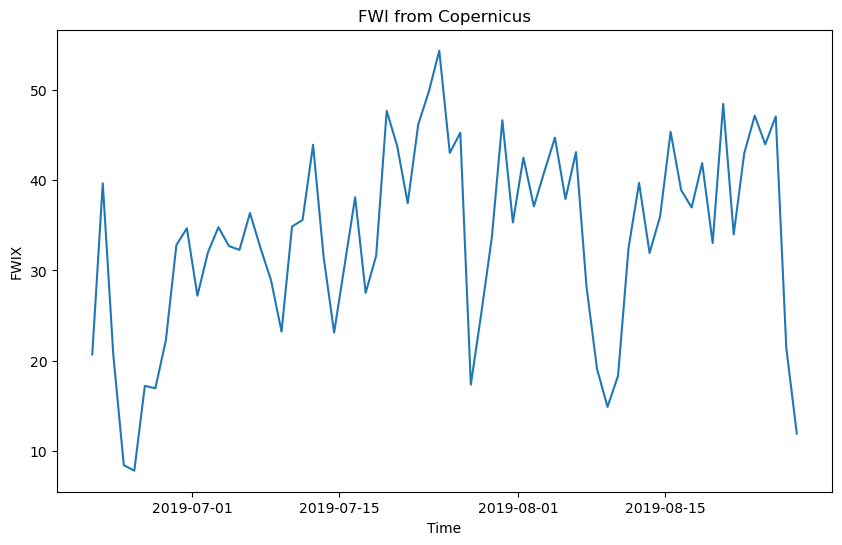

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(filtered_dates, fwinx_values, label='FWIX')
plt.xlabel('Time')
plt.ylabel('FWIX')
plt.title('FWI from Copernicus')
plt.legend
plt.savefig('2019fwi_from_copernicus.png', dpi=300)
plt.show()